In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3_Bianchi, exp3P_Bianchi, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


## Environment

In [25]:
T = 15000
T2 = 5000
MAB_simple = [evolvingBernoulliArm([0.9, 0.1], T2)]
MAB_simple.append(evolvingBernoulliArm([0.1, 0.8], T2))

## Hyperparameters


In [26]:
K = len(MAB_simple)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.01
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [27]:
print(eta_exp3, gamma_exp3, delta, eta_exp3P, gamma_exp3P, beta, eta_exp3IX)

0.0135955598689 0.00733389858595 0.01 0.00456641847424 0.0100941882062 0.0132894912952 0.0135955598689


## Experiment

In [30]:
nb_iter = 50
Weights = np.zeros((3, T, K))
Rewards = np.zeros((3, T))
Prob = np.zeros((3, T, K))
nb_iter = 50

for i in range(nb_iter):
    rew, weights_exp, proba_hist_exp3 = exp3_Bianchi(MAB_simple, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P_Bianchi(MAB_simple, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB_simple, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    Rewards += [rew_cumsum, rewP_cumsum, rewIX_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
Rewards /= nb_iter
Weights /= nb_iter
Prob /= nb_iter

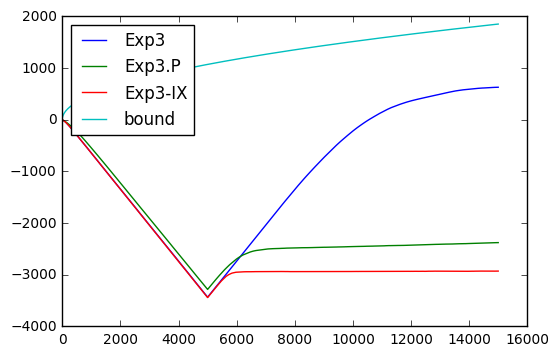

In [31]:
best_cumsum = [0.2 * t for t in range(1, T2 + 1)]
best_cumsum += [0.2 * T2 + 0.8 * (t -  T2) for t in range(T2 + 1, T + 1)]
plt.plot(best_cumsum - Rewards[0], label="Exp3")
plt.plot(best_cumsum - Rewards[1], label="Exp3.P")
plt.plot(best_cumsum - Rewards[2], label="Exp3-IX")

delta = 0.01
plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="bound")
plt.legend(loc="upper left")


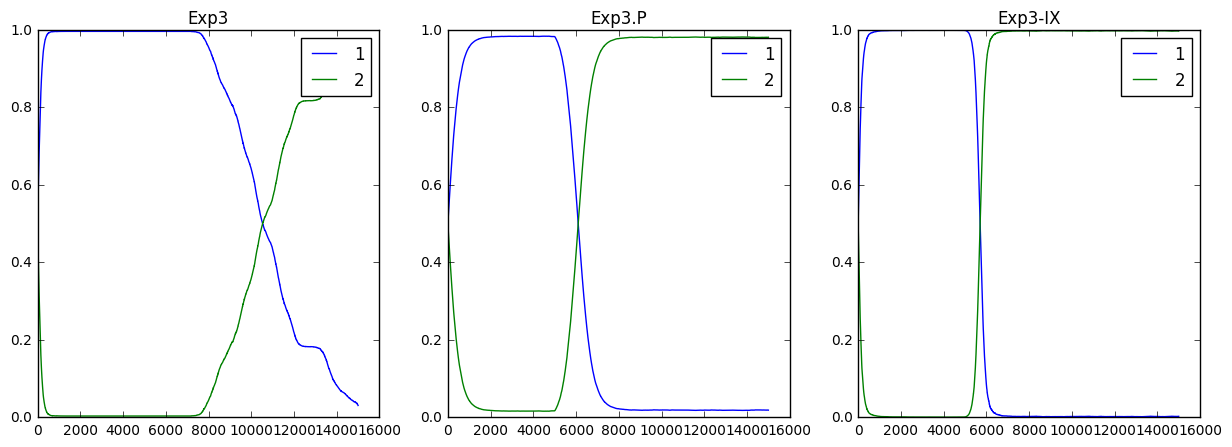

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([1, 2])
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([1, 2])
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([1, 2])

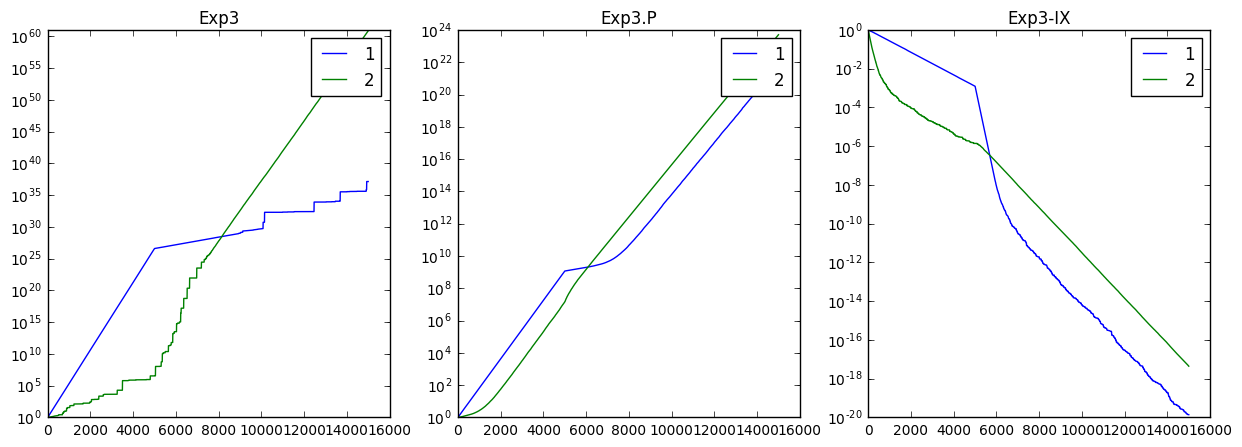

In [33]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.semilogy()
plt.plot(Weights[0])
plt.title("Exp3")
plt.legend([1, 2])

plt.subplot(1, 3, 2)

plt.semilogy()
plt.plot(Weights[1])
plt.title("Exp3.P")
plt.legend([1, 2])

plt.subplot(1, 3, 3)

plt.semilogy()
plt.plot(Weights[2])
plt.title("Exp3-IX")

plt.legend([1, 2])